#Библиотеки

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import plotly.graph_objects as go
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

#1. Найти данные для кластеризации. Данные в группе не должны повторяться. Если признаки в данных имеют очень сильно разные масштабы, то необходимо данные предварительно нормализовать.

In [ ]:
data = pd.read_csv("bank_transactions_data_2.csv")
data.head(10)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39
5,TX000006,AC00393,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,D000579,117.67.192.211,M054,ATM,18,Student,172,1,781.68,2024-11-04 08:06:36
6,TX000007,AC00199,7.08,2023-02-15 16:36:48,Credit,Seattle,D000241,140.212.253.222,M019,ATM,37,Doctor,139,1,13316.71,2024-11-04 08:10:09
7,TX000008,AC00069,171.42,2023-05-08 17:47:59,Credit,Indianapolis,D000500,92.214.76.157,M020,Branch,67,Retired,291,1,2796.24,2024-11-04 08:10:55
8,TX000009,AC00135,106.23,2023-03-21 16:59:46,Credit,Detroit,D000690,24.148.92.177,M035,Branch,51,Engineer,86,1,9095.14,2024-11-04 08:11:14
9,TX000010,AC00385,815.96,2023-03-31 16:06:57,Debit,Nashville,D000199,32.169.88.41,M007,ATM,55,Doctor,120,1,1021.88,2024-11-04 08:06:32


<table style="width:100%; border: 1px solid black; border-collapse: collapse;">
  <tr>
    <th style="border: 1px solid black; padding: 8px; text-align: left;">Название столбца</th>
    <th style="border: 1px solid black; padding: 8px; text-align: left;">Описание данных</th>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">TransactionID</td>
    <td style="border: 1px solid black; padding: 8px;">Уникальный буквенно-цифровой идентификатор для каждой транзакции.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">AccountID</td>
    <td style="border: 1px solid black; padding: 8px;">Уникальный идентификатор для каждого аккаунта, по которому могут проходить несколько транзакций.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">TransactionAmount</td>
    <td style="border: 1px solid black; padding: 8px;">Денежная сумма каждой транзакции, варьирующаяся от небольших повседневных расходов до крупных покупок.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">TransactionDate</td>
    <td style="border: 1px solid black; padding: 8px;">Отметка времени для каждой транзакции, фиксирующая дату и время.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">TransactionType</td>
    <td style="border: 1px solid black; padding: 8px;">Категориальное поле, указывающее тип транзакции ('Кредит' или 'Дебет').</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">Location</td>
    <td style="border: 1px solid black; padding: 8px;">Географическое местоположение транзакции, представленное названиями городов США.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">DeviceID</td>
    <td style="border: 1px solid black; padding: 8px;">Буквенно-цифровой идентификатор устройства, использованного для совершения транзакции.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">IP Address</td>
    <td style="border: 1px solid black; padding: 8px;">IPv4-адрес, связанный с транзакцией, который может изменяться для некоторых аккаунтов.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">MerchantID</td>
    <td style="border: 1px solid black; padding: 8px;">Уникальный идентификатор для торговцев, показывающий предпочитаемых и аутсайдеров для каждого аккаунта.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">AccountBalance</td>
    <td style="border: 1px solid black; padding: 8px;">Баланс на аккаунте после транзакции, логически коррелирующий с типом и суммой транзакции.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">PreviousTransactionDate</td>
    <td style="border: 1px solid black; padding: 8px;">Отметка времени для последней транзакции на аккаунте, используемая для расчета частоты транзакций.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">Channel</td>
    <td style="border: 1px solid black; padding: 8px;">Канал, через который была совершена транзакция (например, Онлайн, Банкомат, Отделение).</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">CustomerAge</td>
    <td style="border: 1px solid black; padding: 8px;">Возраст владельца аккаунта, с логическими группировками по профессии.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">CustomerOccupation</td>
    <td style="border: 1px solid black; padding: 8px;">Профессия владельца аккаунта (например, Врач, Инженер, Студент, Пенсионер), отражающая модели доходов.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">TransactionDuration</td>
    <td style="border: 1px solid black; padding: 8px;">Продолжительность транзакции в секундах, варьируется в зависимости от типа транзакции.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">LoginAttempts</td>
    <td style="border: 1px solid black; padding: 8px;">Количество попыток входа перед транзакцией, более высокие значения могут указывать на потенциальные аномалии.</td>
  </tr>
</table>


In [ ]:
data.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [ ]:
data.isna().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [ ]:
sum(data.duplicated())

0

In [ ]:
label_encoder = LabelEncoder()
data['TransactionType'] = label_encoder.fit_transform(data['TransactionType'])
data['Channel'] = label_encoder.fit_transform(data['Channel'])
data['CustomerOccupation'] = label_encoder.fit_transform(data['CustomerOccupation'])
data['Location'] = label_encoder.fit_transform(data['Location'])

In [ ]:
data.head(10)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,1,36,D000380,162.198.218.92,M015,0,70,0,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,1,15,D000051,13.149.61.4,M052,0,68,0,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,1,23,D000235,215.97.143.157,M009,2,19,3,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,1,33,D000187,200.13.225.150,M002,2,26,3,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,0,1,D000308,65.164.3.100,M091,2,26,3,198,1,7429.40,2024-11-04 08:06:39
5,TX000006,AC00393,92.15,2023-04-03 17:15:01,1,28,D000579,117.67.192.211,M054,0,18,3,172,1,781.68,2024-11-04 08:06:36
6,TX000007,AC00199,7.08,2023-02-15 16:36:48,0,39,D000241,140.212.253.222,M019,0,37,0,139,1,13316.71,2024-11-04 08:10:09
7,TX000008,AC00069,171.42,2023-05-08 17:47:59,0,16,D000500,92.214.76.157,M020,1,67,2,291,1,2796.24,2024-11-04 08:10:55
8,TX000009,AC00135,106.23,2023-03-21 16:59:46,0,11,D000690,24.148.92.177,M035,1,51,1,86,1,9095.14,2024-11-04 08:11:14
9,TX000010,AC00385,815.96,2023-03-31 16:06:57,1,26,D000199,32.169.88.41,M007,0,55,0,120,1,1021.88,2024-11-04 08:06:32


In [ ]:
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
data['PreviousTransactionDate'] = pd.to_datetime(data['PreviousTransactionDate'])

data['DaysSinceLastTransaction'] = (data['TransactionDate'] - data['PreviousTransactionDate']).dt.days

In [ ]:
data.head(10)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,DaysSinceLastTransaction
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,1,36,D000380,162.198.218.92,M015,0,70,0,81,1,5112.21,2024-11-04 08:08:08,-573
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,1,15,D000051,13.149.61.4,M052,0,68,0,141,1,13758.91,2024-11-04 08:09:35,-496
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,1,23,D000235,215.97.143.157,M009,2,19,3,56,1,1122.35,2024-11-04 08:07:04,-483
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,1,33,D000187,200.13.225.150,M002,2,26,3,25,1,8569.06,2024-11-04 08:09:06,-549
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,0,1,D000308,65.164.3.100,M091,2,26,3,198,1,7429.40,2024-11-04 08:06:39,-385
5,TX000006,AC00393,92.15,2023-04-03 17:15:01,1,28,D000579,117.67.192.211,M054,0,18,3,172,1,781.68,2024-11-04 08:06:36,-581
6,TX000007,AC00199,7.08,2023-02-15 16:36:48,0,39,D000241,140.212.253.222,M019,0,37,0,139,1,13316.71,2024-11-04 08:10:09,-628
7,TX000008,AC00069,171.42,2023-05-08 17:47:59,0,16,D000500,92.214.76.157,M020,1,67,2,291,1,2796.24,2024-11-04 08:10:55,-546
8,TX000009,AC00135,106.23,2023-03-21 16:59:46,0,11,D000690,24.148.92.177,M035,1,51,1,86,1,9095.14,2024-11-04 08:11:14,-594
9,TX000010,AC00385,815.96,2023-03-31 16:06:57,1,26,D000199,32.169.88.41,M007,0,55,0,120,1,1021.88,2024-11-04 08:06:32,-584


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   TransactionID             2512 non-null   object        
 1   AccountID                 2512 non-null   object        
 2   TransactionAmount         2512 non-null   float64       
 3   TransactionDate           2512 non-null   datetime64[ns]
 4   TransactionType           2512 non-null   int64         
 5   Location                  2512 non-null   int64         
 6   DeviceID                  2512 non-null   object        
 7   IP Address                2512 non-null   object        
 8   MerchantID                2512 non-null   object        
 9   Channel                   2512 non-null   int64         
 10  CustomerAge               2512 non-null   int64         
 11  CustomerOccupation        2512 non-null   int64         
 12  TransactionDuration 

In [ ]:
data['Location'].unique()

array([36, 15, 23, 33,  1, 28, 39, 16, 11, 26,  0, 22, 21, 10,  2,  8, 20,
       19, 13, 24, 25,  3, 27, 37, 38, 35, 30,  5, 40,  6, 34, 18, 29, 41,
        9,  4, 17, 31, 42, 12,  7, 14, 32])

In [ ]:
# Выбираем числовые столбцы для нормализации
numerical_columns = ['TransactionAmount', 'AccountBalance', 'TransactionDuration', 'CustomerAge', 'DaysSinceLastTransaction']

# Применяем стандартизацию
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [ ]:
data.head(10)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,DaysSinceLastTransaction
0,TX000001,AC00128,-0.971275,2023-04-11 16:29:14,1,36,D000380,162.198.218.92,M015,0,1.423718,0,-0.552443,1,-0.000537,2024-11-04 08:08:08,-0.800526
1,TX000002,AC00455,0.269440,2023-06-27 16:44:19,1,15,D000051,13.149.61.4,M052,0,1.311287,0,0.305314,1,2.216472,2024-11-04 08:09:35,-0.076554
2,TX000003,AC00019,-0.586882,2023-07-10 18:16:08,1,23,D000235,215.97.143.157,M009,2,-1.443277,3,-0.909842,1,-1.023534,2024-11-04 08:07:04,0.045675
3,TX000004,AC00070,-0.387456,2023-05-05 16:32:11,1,33,D000187,200.13.225.150,M002,2,-1.049768,3,-1.353017,1,0.885797,2024-11-04 08:09:06,-0.574872
4,TX000005,AC00411,-0.973468,2023-10-16 17:51:24,0,1,D000308,65.164.3.100,M091,2,-1.049768,3,1.120184,1,0.593589,2024-11-04 08:06:39,0.967094
5,TX000006,AC00393,-0.703844,2023-04-03 17:15:01,1,28,D000579,117.67.192.211,M054,0,-1.499493,3,0.748489,1,-1.110882,2024-11-04 08:06:36,-0.875744
6,TX000007,AC00199,-0.995292,2023-02-15 16:36:48,0,39,D000241,140.212.253.222,M019,0,-0.431397,0,0.276722,1,2.103092,2024-11-04 08:10:09,-1.317649
7,TX000008,AC00069,-0.432268,2023-05-08 17:47:59,0,16,D000500,92.214.76.157,M020,1,1.255071,2,2.449708,1,-0.594350,2024-11-04 08:10:55,-0.546666
8,TX000009,AC00135,-0.655607,2023-03-21 16:59:46,0,11,D000690,24.148.92.177,M035,1,0.355622,1,-0.480963,1,1.020684,2024-11-04 08:11:14,-0.997973
9,TX000010,AC00385,1.775907,2023-03-31 16:06:57,1,26,D000199,32.169.88.41,M007,0,0.580484,0,0.005099,1,-1.049295,2024-11-04 08:06:32,-0.903950


#2. Провести кластеризацию данных с помощью алгоритма k-means. Использовать «правило локтя» и коэффициент силуэта для поиска оптимального количества кластеров.

In [ ]:
data_clear = data.drop(columns=['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID', 'TransactionDate', 'PreviousTransactionDate'])
data_clear.head(10)

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,DaysSinceLastTransaction
0,-0.971275,1,36,0,1.423718,0,-0.552443,1,-0.000537,-0.800526
1,0.269440,1,15,0,1.311287,0,0.305314,1,2.216472,-0.076554
2,-0.586882,1,23,2,-1.443277,3,-0.909842,1,-1.023534,0.045675
3,-0.387456,1,33,2,-1.049768,3,-1.353017,1,0.885797,-0.574872
4,-0.973468,0,1,2,-1.049768,3,1.120184,1,0.593589,0.967094
5,-0.703844,1,28,0,-1.499493,3,0.748489,1,-1.110882,-0.875744
6,-0.995292,0,39,0,-0.431397,0,0.276722,1,2.103092,-1.317649
7,-0.432268,0,16,1,1.255071,2,2.449708,1,-0.594350,-0.546666
8,-0.655607,0,11,1,0.355622,1,-0.480963,1,1.020684,-0.997973
9,1.775907,1,26,0,0.580484,0,0.005099,1,-1.049295,-0.903950


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_clear)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

models = []
score1 = []
score2 = []

for i in range(2, 10):
  model = KMeans(n_clusters=i, random_state=123, init='k-means++').fit(X_scaled)
  models.append(model)
  score1.append(model.inertia_)
  score2.append(silhouette_score(X_scaled, model.labels_))

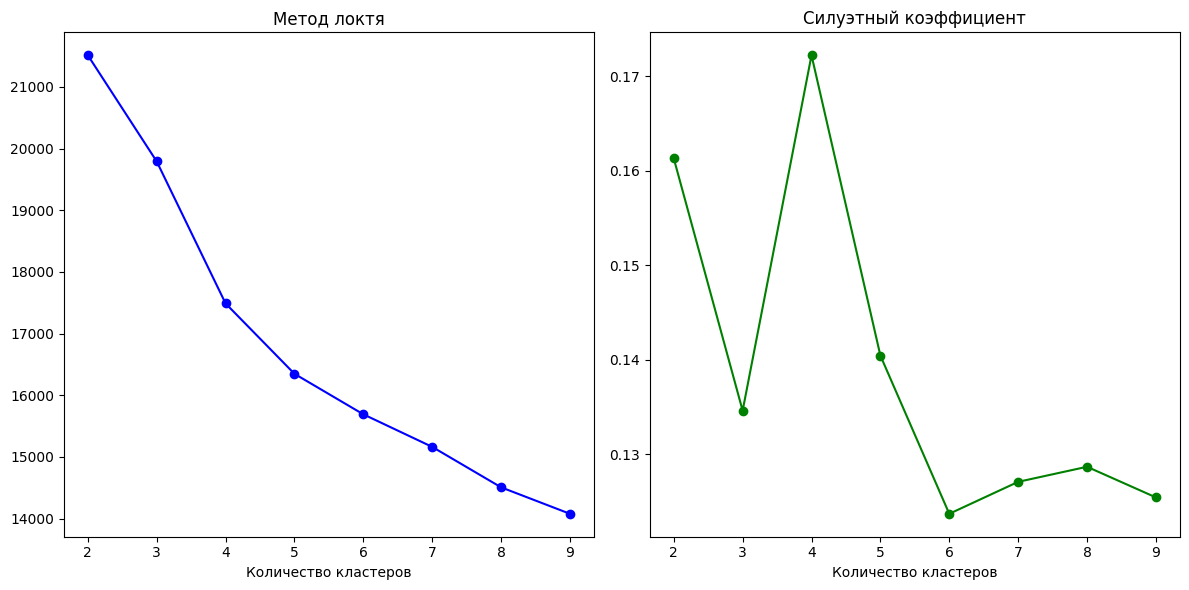

In [ ]:
plt.figure(figsize=(12, 6))

# Метод локтя
plt.subplot(1, 2, 1)
plt.plot(range(2, 10), score1, marker='o', color='b')
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')

# Силуэтный коэффициент
plt.subplot(1, 2, 2)
plt.plot(range(2, 10), score2, marker='o', color='g')
plt.title('Силуэтный коэффициент')
plt.xlabel('Количество кластеров')

plt.tight_layout()
plt.show()

In [ ]:
model1 = KMeans(n_clusters = 4, random_state = 123, init = 'k-means++')

In [ ]:
model1.fit(X_scaled)

KMeans(n_clusters=4, random_state=123)

In [ ]:
model1.cluster_centers_

array([[-2.32851616e-02,  5.40537760e-01, -3.02304839e-03,
        -1.24013885e-01,  4.22619659e-01, -4.71355159e-01,
        -8.45370934e-03, -1.88569256e-01,  3.17852104e-01,
        -1.82960327e-02],
       [ 6.74270900e-02,  5.86636633e-02,  1.88022809e-02,
        -2.22683013e-02, -1.20805712e+00,  1.29675279e+00,
         1.49600318e-02, -1.88498463e-01, -9.26069433e-01,
        -1.15528224e-02],
       [-7.28685414e-02, -6.33899730e-02, -5.93725914e-02,
         1.14926487e-01, -7.70844406e-03, -9.77136855e-02,
         1.74995400e-01,  4.78958014e+00,  8.90577710e-02,
        -5.70568160e-02],
       [-9.82250002e-03, -1.85000952e+00, -5.21530797e-03,
         4.14964717e-01,  4.58053168e-01, -4.09336718e-01,
        -3.50394622e-02, -1.86846117e-01,  3.49537564e-01,
         9.07423568e-02]])

In [ ]:
labels = model1.labels_

In [ ]:
X_scaled_df = pd.DataFrame(X_scaled, columns=data_clear.columns)
X_scaled_df['Claster'] = labels

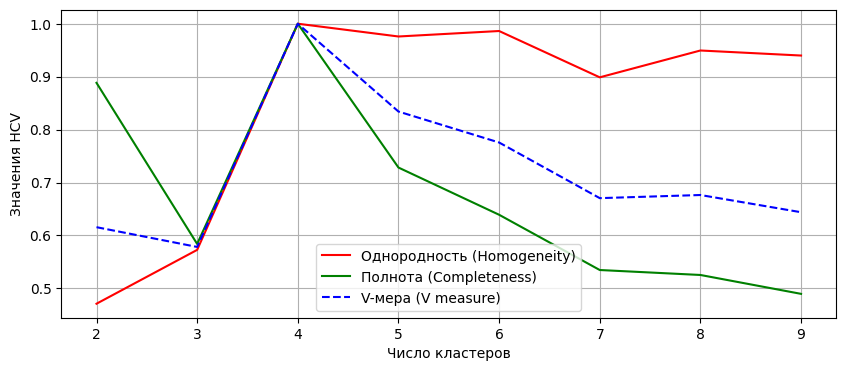

In [ ]:
from sklearn.metrics import homogeneity_completeness_v_measure

HCVs = []
labels_true = X_scaled_df['Claster']  # Истинные метки кластеров (если известны)

for i in range(2, 10):
    model = KMeans(n_clusters=i, random_state=123, init='k-means++').fit(X_scaled)
    models.append(model)
    score1.append(model.inertia_)
    score2.append(silhouette_score(X_scaled, model.labels_))
    HCVs.append(homogeneity_completeness_v_measure(labels_true, model.labels_))

# Визуализация HCV
plt.figure(figsize=(10, 4))
plt.plot(range(2, 10), [el[0] for el in HCVs], 'r', label='Однородность (Homogeneity)')
plt.plot(range(2, 10), [el[1] for el in HCVs], 'g', label='Полнота (Completeness)')
plt.plot(range(2, 10), [el[2] for el in HCVs], 'b--', label='V-мера (V measure)')
plt.xlabel("Число кластеров")
plt.ylabel("Значения HCV")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.graph_objects as go

pca = PCA(n_components = 0.4)
data_pca = pca.fit_transform(X_scaled)
data_pca = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2', 'PCA3'])
data_pca['Claster'] = labels

In [ ]:
data_pca.shape[1]

4

In [ ]:
data_pca.head(10)

,PCA1,PCA2,PCA3,Claster
0,-1.480874,1.332425,-0.593935,0
1,-2.772743,1.369733,-0.051995,0
2,2.122506,-0.559799,-0.334469,1
3,0.798946,-0.495182,-0.837745,1
4,0.792019,-2.146676,1.348388,3
5,2.252406,1.311434,0.394738,1
6,-1.981311,-0.178400,-0.043236,3
7,-0.024775,-1.119793,1.568469,3
8,-1.166375,-0.991942,0.467463,3
9,-0.323515,1.318377,-0.732710,0


In [ ]:
fig = go.Figure(data=[go.Scatter3d(
    x = data_pca['PCA1'],
    y = data_pca['PCA2'],
    z = data_pca['PCA3'],
    mode = 'markers',
    marker_color = data_pca['Claster'],
    marker_size = 4
)])

fig.update_layout(
    title='3D Cluster Visualization',
    scene=dict(
        xaxis_title = 'Feature 1',
        yaxis_title = 'Feature 2',
        zaxis_title = 'Feature 3'
    )
)

fig.show()

#3. Провести кластеризацию данных с помощью алгоритма иерархической кластеризации.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
model2 = AgglomerativeClustering(4, compute_distances = True)
clastering = model2.fit(X_scaled)
data_pca['Claster'] = clastering.labels_

In [ ]:
fig = go.Figure(data=[go.Scatter3d(
    x=data_pca['PCA1'],
    y=data_pca['PCA2'],
    z=data_pca['PCA3'],
    mode='markers',
    marker_color = data_pca['Claster'],
    marker_size = 4
)])

fig.show()

In [ ]:
unique, counts = np.unique(labels, return_counts=True)
cluster_counts = pd.DataFrame(zip(unique, counts), columns=['Cluster', 'Count'])
print(cluster_counts)

   Cluster  Count
0        0   1366
1        1    635
2        2     95
3        3    416


#4. Провести кластеризацию данных с помощью алгоритма DBSCAN.

In [ ]:
from sklearn.cluster import DBSCAN
model3 = DBSCAN(eps = 1, min_samples = 10).fit(X_scaled)

In [ ]:
data_pca['Claster'] = model3.labels_

In [ ]:
from sklearn.cluster import DBSCAN
model3 = DBSCAN(eps = 1.7, min_samples = 10).fit(X_scaled)

data_pca['Claster'] = model3.labels_

import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter3d(
    x=data_pca['PCA1'],  # Используем первый признак для оси X
    y=data_pca['PCA2'],  # Используем второй признак для оси Y
    z=data_pca['PCA3'],  # Используем третий признак для оси Z
    mode='markers',  # Убираем текст
    marker=dict(
        color=data_pca['Claster'],  # Используем метки кластеров для окраски
        size=4,
        colorbar=dict(  # Добавляем шкалу
            title='Cluster',  # Заголовок шкалы
            tickvals=[i for i in range(data_pca['Claster'].min(), data_pca['Claster'].max() + 1)],  # Значения для шкалы
            ticktext=[f'Cluster {i}' for i in range(data_pca['Claster'].min(), data_pca['Claster'].max() + 1)]  # Подписи для шкалы
        )
    )
)])

fig.show()

In [ ]:
print(data_pca['Claster'].unique())

[ 0  1 -1  2  3]


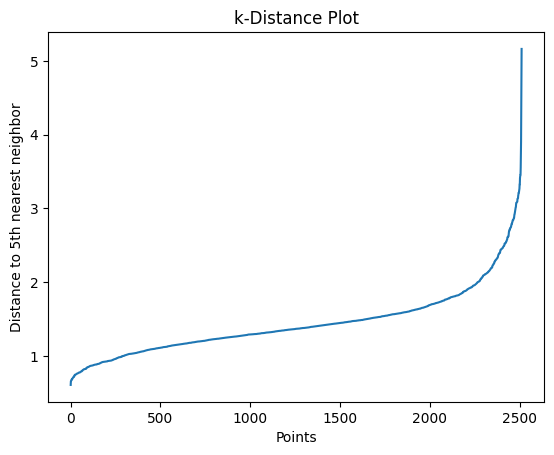

In [ ]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Используем модель для нахождения ближайших соседей
neighbors = NearestNeighbors(n_neighbors=10)  # n_neighbors = min_samples
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Строим график для k-дистанций
distances = np.sort(distances[:, 4], axis=0)  # Сортируем по 5-му ближайшему соседу
plt.plot(distances)
plt.title('k-Distance Plot')
plt.xlabel('Points')
plt.ylabel('Distance to 5th nearest neighbor')
plt.show()

#5. Визуализировать кластеризованные данные с помощью t-SNE или UMAP, если необходимо. Если данные трехмерные, то можно использовать трехмерный точечный график.